# Python for traders and investors -- Chapter 5 Python information superhighway
## 5.1 Data structures
__Lists__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = [2, 6, 10.8, 200]

In [3]:
stocks = ['AMZN', 'GOOGL', 'KO']

In [4]:
mix = [2, 'AMZN', 'price']

In [5]:
# Create an empty list
b = []

In [6]:
# Add a single element to the end of the list
b.append(1)
b

[1]

In [7]:
# Remove a particular element
# a = [2, 6, 10.8, 200]
a.remove(2)
a

[6, 10.8, 200]

In [8]:
b.append(2)
b

[1, 2]

In [9]:
# Concatenate list to another List
a.extend(b)
a

[6, 10.8, 200, 1, 2]

In [10]:
# We can also use '+' to concatenate two lists:
a + b

[6, 10.8, 200, 1, 2, 1, 2]

In [11]:
# Sort the list
a.sort()
a

[1, 2, 6, 10.8, 200]

__Dictionaries__

Dictionaries are another data type similar to lists, arrays and strings. They simply contain a collection of key/value pairs. Dictionaries are heavily used in quant applications. To denote a dictionary we use curly braces **{}**. Here is an example:

In [12]:
# declare a dict
performance_dict = {'PnL':14.34, 'Sharpe':2.12, 'Max drawdown':0.16, 'Beta': 0.21}

In [13]:
# Access the value of a particular key
performance_dict['PnL']

14.34

In [14]:
# Add new contents into the dict
performance_dict['Sortino'] = 2.6
performance_dict

{'PnL': 14.34,
 'Sharpe': 2.12,
 'Max drawdown': 0.16,
 'Beta': 0.21,
 'Sortino': 2.6}

In [15]:
# Get a list of the keys
performance_dict.keys()

dict_keys(['PnL', 'Sharpe', 'Max drawdown', 'Beta', 'Sortino'])

In [16]:
# Get a list of the values
performance_dict.values()

dict_values([14.34, 2.12, 0.16, 0.21, 2.6])

In [17]:
# Modify the value of a particular key:
performance_dict['Beta'] = 0.3

In [18]:
# We can have dicts of dicts:
performance_dict['Trades'] = {'2017-11-01':12, '2017-11-03':-4, '2017-11-05':2}
performance_dict

{'PnL': 14.34,
 'Sharpe': 2.12,
 'Max drawdown': 0.16,
 'Beta': 0.3,
 'Sortino': 2.6,
 'Trades': {'2017-11-01': 12, '2017-11-03': -4, '2017-11-05': 2}}

__Converting 2 lists into a dict__

In [19]:
# List of strings
heading = ['Company', 'marketcap', 'volume', 'Beta (5Y Monthly)', 'EPS (TTM)', 'PE Ratio (TTM)']
    
# List of ints
contents = ['AMZN', '916B', 2969044, 1.52, 22.57, 81.84]

In [20]:
# Create a zip object
zipbObj = zip(heading, contents)
 
# Create a dictionary from zip object
dict1 = dict(zipbObj)
dict1

{'Company': 'AMZN',
 'marketcap': '916B',
 'volume': 2969044,
 'Beta (5Y Monthly)': 1.52,
 'EPS (TTM)': 22.57,
 'PE Ratio (TTM)': 81.84}

## 5.2 Functions

In many cases our programs have re-occuring bit of code that we don't want to write out over and over again. For those cases we should use functions. Functions also make our code cleaner and easier to read and we can do some interesting things with them. We define a function like this:

In [21]:
def my_function(a, b):
    return a+b

In [22]:
# Calling the function
my_function(2, 4)

6

In [23]:
my_function(2,'hi')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

Unfortunately, this happens quite frequently in the real world. For example, when we connect to a data service and we get a bad data package from the internet, we get an error but we want our program to move on. Let's create such a situation and find a solution. First, we create two data packages: 

In [24]:
# Create two data packages:
package1 = list(range(10))
package2 = list(range(10))

# Now we introduce a bad value
package2[6] = 'doh!'

package2[3:9]

[3, 4, 5, 'doh!', 7, 8]

Next, we create a function that processes the data. We run a for loop and add up the numbers:

In [25]:
def adder(package1, package2):
    for p1, p2 in zip(package1,package2):
        print('p1:',p1,'|| p2:',p2,'|| sum of values:',p1+p2)

Note that we use the *zip* function to iterate over two lists at once. The condition is that our lists have the same size.

Let's now run the adder. We expect it to crash at p1=6 & p2=6:

In [26]:
adder(package1,package2)

p1: 0 || p2: 0 || sum of values: 0
p1: 1 || p2: 1 || sum of values: 2
p1: 2 || p2: 2 || sum of values: 4
p1: 3 || p2: 3 || sum of values: 6
p1: 4 || p2: 4 || sum of values: 8
p1: 5 || p2: 5 || sum of values: 10


TypeError: unsupported operand type(s) for +: 'int' and 'str'

Since we don't want our program to terminate when the error occurs we can use an error handler that uses the *try:* and *except:* commands. Our new function would look like this:

In [27]:
def adder(package1,package2):
    for p1, p2 in zip(package1,package2):
        try:
            print('p1:',p1,'|| p2:',p2,'|| sum of values:',p1+p2)
        except:
            print('*** Could not calculate the right value ***')

In [29]:
adder(package1,package2)

p1: 0 || p2: 0 || sum of values: 0
p1: 1 || p2: 1 || sum of values: 2
p1: 2 || p2: 2 || sum of values: 4
p1: 3 || p2: 3 || sum of values: 6
p1: 4 || p2: 4 || sum of values: 8
p1: 5 || p2: 5 || sum of values: 10
*** Could not calculate the right value ***
p1: 7 || p2: 7 || sum of values: 14
p1: 8 || p2: 8 || sum of values: 16
p1: 9 || p2: 9 || sum of values: 18


Now our function runs smoothly to the end and only gives us a warning. In many cases we can't be sure what the nature of our error is. We still want the error message without the program stopping. The package *traceback* can help us with this. In the next example we are not plotting all the values anymore

In [30]:
import traceback

def adder(package1,package2):
    for p1,p2 in zip(package1,package2):
        try:
            p1+p2
        except:
            print('Values to be processed --> p1:',p1,'|| p2:',p2)
            print('*** Could not calculate the right value ***',traceback.format_exc())

adder(package1,package2)

Values to be processed --> p1: 6 || p2: doh!
*** Could not calculate the right value *** Traceback (most recent call last):
  File "C:\Users\inhwa\AppData\Local\Temp/ipykernel_26548/3271072884.py", line 6, in adder
    p1+p2
TypeError: unsupported operand type(s) for +: 'int' and 'str'



Now we can analyse our error more closely.

## 5.3 More functions

Functions can have default arguments which may or may not be specified when a function is called:

In [31]:
def my_fun(a, b, mode='add'):
    if mode == 'add':
        return a+b
    elif mode == 'multiply':
        return a*b
    else:
        return a-b
    
print(my_fun(3,4))
print(my_fun(3,4,mode='add'))
print(my_fun(3,4,mode='multiply'))
print(my_fun(3,4,mode='subtract'))

7
7
12
-1


As you can see, we can either include the default argument or leave them out. Our functions also used a conditional statetment if..elif..else. This is quite self-explainatory: "do this if condition A, otherwise do something else.

Function can also have arbitrary numbers of input arguments:

In [32]:
def arb_fun(*args):
    if len(args)==1:
        return args[0]
    elif len(args)==2:
        return args[0]*args[1]
    elif len(args)>2:
        return 'more than 2 args supplied'
    else:
        return 'No values supplied'
    
print(arb_fun(1))
print(arb_fun(5,2))
print(arb_fun(3,1,5,4))
print(arb_fun())

1
10
more than 2 args supplied
No values supplied


We can also use functions as input variables of other functions. This happens a lot when we run optimisation routines, which we will see later. For now, please have a look at this simple example:

In [33]:
def square(a):
    return a**2

def root(a):
    return a**0.5

def complex_fun(f,x):
    return f(x)

print(complex_fun(square, 25))
print(complex_fun(root, 25))

625
5.0


__The range() function__

In [34]:
range(5)

range(0, 5)

In [35]:
# In the For loop
for i in range(5):
    print(i)

0
1
2
3
4


In [36]:
# Generating a sequence
# Only specify the end point
list(range(5))

[0, 1, 2, 3, 4]

In [37]:
# Also specify the starting point
list(range(2, 8))

[2, 3, 4, 5, 6, 7]

In [38]:
# Also specify the step
list(range(2, 8, 2))

[2, 4, 6]

In [39]:
# We can have a descending sequence
list(range(2, -6, -2))

[2, 0, -2, -4]

## 5.4 Pythonic Tricks (1) -- Map and Lambda

__Map__

With map we can apply a function to a list in a convenient way without having to write a loop.

In [40]:
import numpy as np
my_list = np.random.randn(5)
my_list

array([-0.66411954,  1.87097415, -0.7653102 , -1.71310248,  2.02529548])

Now we are mapping the sign function to the list.

In [41]:
list(map(np.sign, my_list))

[-1.0, 1.0, -1.0, -1.0, 1.0]

Another example, turning a list of floats into a list of strings:

In [42]:
list(map(str, my_list))

['-0.6641195408870599',
 '1.8709741525653791',
 '-0.7653101983788456',
 '-1.713102475173901',
 '2.025295483208872']

__Lambda functions__

In [43]:
anon = lambda x: 4*x**2 + 3*x + 5
anon(5)

120

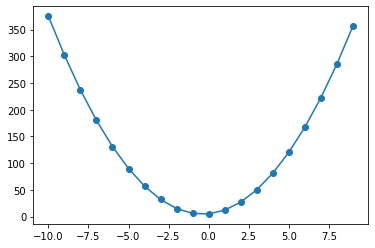

In [44]:
plt.plot(range(-10,10), list(map(lambda x: 4*x**2 + 3*x + 5, 
                                 range(-10,10))), '-o')

We put the lambda in a map function and with one line of code we could plot a complex function. No loops, no function declarations. I admit, it will take a moment to read that line and understand it.

It can also be useful in optimisations. Let's find the minimum of our function:

In [45]:
from scipy.optimize import minimize

x = minimize(lambda x: 4*x**2 + 3*x + 5,0)['x']

In [46]:
# inserting x into equation
4*x**2 + 3*x +5

array([4.4375])

In [47]:
# Test:
min_value = minimize(lambda x: 4*x**2 + 3*x + 5,0)
min_value

      fun: 4.4375
 hess_inv: array([[1]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.375])

In [48]:
min_value['fun']

4.4375

## 5.5 Powerful loops
__For loops__

In [49]:
temp = []
for i in 'Hi':
    for j in range(3):
        temp.append(i+str(j))
        
temp

['H0', 'H1', 'H2', 'i0', 'i1', 'i2']

__While loops__

While loops are like for loops with the difference that they terminate when a certain condition is False.
**_while True: pass_**
will run forever because it is never false. Here an example that will terminate:

In [50]:
a = 0
while a < 5:
    print(a)
    a += 1

0
1
2
3
4


We can also use the break statement to terminate (any) loop:

In [51]:
a = 0
while True:
    print(a)
    a += 1
    if a == 4:
        break

0
1
2
3


__List comprehensions__

List comprehensions are loops in a compressed form that output lists, tuples or dicts. Lets have a look at this loop:

In [52]:
k = []
for i in range(10):
    if i%2 == 0:
        k.append(i)
        
k

[0, 2, 4, 6, 8]

In [53]:
# Compressing the above codes into one line:
[i for i in range(10) if not i%2]

[0, 2, 4, 6, 8]

In [54]:
# 'if else' in list comprehensions
["Even" if i%2==0 else "Odd" for i in range(10)]

['Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even', 'Odd']

In [55]:
# List comprehension for a dictionary:
{ticker:len(ticker) for ticker in ['AAPL', 'AMZN', 'IBM', 'FB']}

{'AAPL': 4, 'AMZN': 4, 'IBM': 3, 'FB': 2}

In [56]:
# List comprehension for tuples:
[(ticker, len(ticker)) for ticker in ['AAPL', 'AMZN', 'IBM', 'FB']]

[('AAPL', 4), ('AMZN', 4), ('IBM', 3), ('FB', 2)]